<a href="https://colab.research.google.com/github/meetdelvadiya/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Meet_Delvadiya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#**Import Statements**

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
from datetime import datetime
from datetime import date

#**Mounting drive**

In [ ]:
from google.colab import drive
 
drive.mount('/content/drive')

Mounted at /content/drive


#**Loading and inspecting data**

In [ ]:
# reading CSV file from mounted drive
df=pd.read_csv("/content/drive/MyDrive/Dataset/Play Store Data.csv")
df_user=pd.read_csv("/content/drive/MyDrive/Dataset/User Reviews.csv")

In [ ]:
#It gives Top 5 rows of Dataset 

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#It gives last 5 rows of Dataset

df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
#It gives total columns, data types and null count of dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# table to return datatype, null count and unique counnt
def printinfo():
    temp = pd.DataFrame(index=df.columns)
    temp['data_type'] = df.dtypes
    temp['null_count'] = df.isnull().sum()
    temp['unique_count'] = df.nunique()
    return temp

printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


As we can observe, Null values in dataset:

Rating = 1474

Type = 1

Content Rating = 1

Current Ver = 8

Android Ver = 3

In [ ]:
# Checking duplicate rows 

df[df.duplicated()].count()

App               483
Category          483
Rating            474
Reviews           483
Size              483
Installs          483
Type              483
Price             483
Content Rating    483
Genres            483
Last Updated      483
Current Ver       483
Android Ver       483
dtype: int64

In [ ]:
#checking unique values
df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Candy Crush Saga                                      7
Duolingo: Learn Languages Free                        7
                                                     ..
BZ Zombie VR                                          1
Sandbox Number Coloring Book Art - Color By Number    1
Goal Live Scores                                      1
Blur Image - DSLR focus effect                        1
CB News                                               1
Name: App, Length: 9660, dtype: int64

In [ ]:
# Checking if those rows is identical or not for same App
df[df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


We can observe that there is duplicate rows present for same app so we are removing duplicates.

In [ ]:
df.drop_duplicates(['App', 'Category'],inplace=True)

In [ ]:
df[df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [ ]:
df[df.duplicated()].count()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9745 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9745 non-null   object 
 1   Category        9745 non-null   object 
 2   Rating          8281 non-null   float64
 3   Reviews         9745 non-null   object 
 4   Size            9745 non-null   object 
 5   Installs        9745 non-null   object 
 6   Type            9744 non-null   object 
 7   Price           9745 non-null   object 
 8   Content Rating  9744 non-null   object 
 9   Genres          9745 non-null   object 
 10  Last Updated    9745 non-null   object 
 11  Current Ver     9737 non-null   object 
 12  Android Ver     9742 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [ ]:
# checking null value in column 'TYPE'
df[df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
# filling null values in column "TYPE" to free
df['Type'].fillna("Free", inplace = True)

# replacing null values in column "RATING" to the value of mode
modeValueRating = df['Rating'].mode()
df['Rating'].fillna(value=modeValueRating[0], inplace = True)

In [ ]:
# dropping unwanted columns 
df.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

In [ ]:
# checcking for null values in column "CONTENT RATING"
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"


In [ ]:
# dropping the row 10472
df.dropna(subset = ['Content Rating'], inplace=True)

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,5406
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


Now, There is no null value in dataset.

We need to change the datatype of columns into numeric.

**Reviews**

In [ ]:
# changing the data type of column 'reviews'
df['Reviews'] = df.Reviews.astype(int)

**Size**

In [ ]:
df['Size'].value_counts().head()

Varies with device    1250
11M                    183
12M                    181
13M                    179
14M                    178
Name: Size, dtype: int64

In [ ]:
#Converting Size using lamda function

df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', '0' ) if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('M', '')) * 1024 if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('.', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('k', '') if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))


In [ ]:
df['Size'].value_counts().head()

0.0        1250
11264.0     183
12288.0     181
13312.0     179
14336.0     178
Name: Size, dtype: int64

**Installs**

In [ ]:
df['Installs'].value_counts().head()

1,000,000+     1430
100,000+       1114
10,000+        1031
10,000,000+     961
1,000+          889
Name: Installs, dtype: int64

In [ ]:
#Converting Installs with lambda function
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [ ]:
df['Installs'].value_counts().head()

1000000     1430
100000      1114
10000       1031
10000000     961
1000         889
Name: Installs, dtype: int64

**Price**

In [ ]:
df['Price'].value_counts()

0         8986
$0.99      145
$2.99      124
$1.99       73
$4.99       70
          ... 
$1.97        1
$1.61        1
$3.61        1
$3.28        1
$15.46       1
Name: Price, Length: 92, dtype: int64

In [ ]:
# removing $ symbol from the column price
df['Price'] = df.Price.apply(lambda x: x.strip('$'))

# changing data type of column price
df['Price'] = pd.to_numeric(df['Price'])

In [ ]:
df['Price'].value_counts()

0.00     8986
0.99      145
2.99      124
1.99       73
4.99       70
         ... 
1.59        1
46.99       1
19.90       1
28.99       1
1.04        1
Name: Price, Length: 92, dtype: int64

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,5406
Size,float64,0,460
Installs,int64,0,20
Type,object,0,2
Price,float64,0,92
Content Rating,object,0,6
Genres,object,0,119


In [ ]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9744.000000,9.744000e+03,9744.000000,9.744000e+03,9744.000000
mean,4.193853,2.380985e+05,18319.970392,8.203883e+06,1.090734
std,0.494953,1.934409e+06,22125.708336,5.527899e+07,16.778883
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.100000,2.600000e+01,2969.600000,1.000000e+03,0.000000
50%,4.300000,1.015500e+03,9420.800000,1.000000e+05,0.000000
75%,4.500000,3.070025e+04,25600.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,102400.000000,1.000000e+09,400.000000


#**Exploratory Data Analysis**

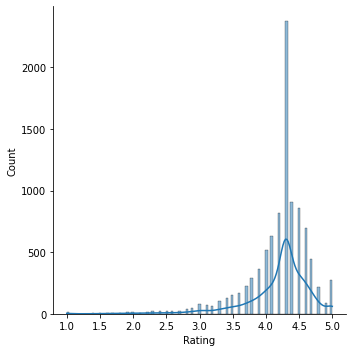

In [ ]:
sns.displot(df['Rating'],kde= True )

As we can see, average rating is nearby 4.5

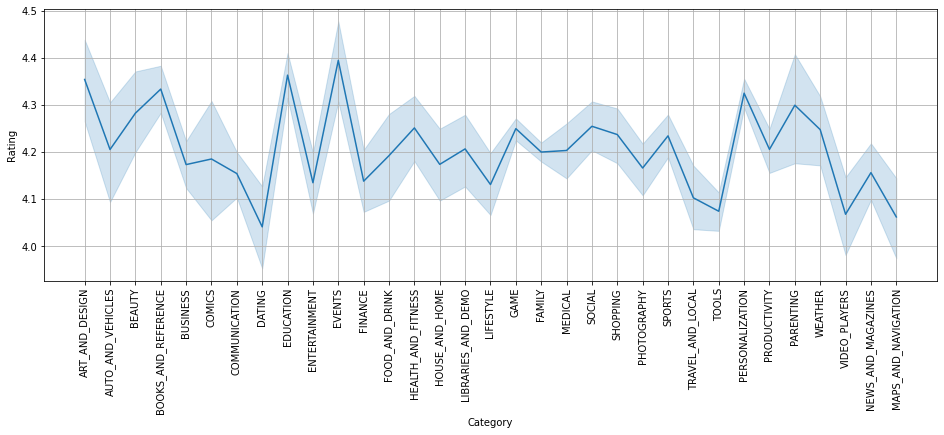

In [ ]:
plt.figure(figsize=(16,5))
sns.lineplot(x='Category',y='Rating',data=df)
plt.xticks(rotation=90)
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


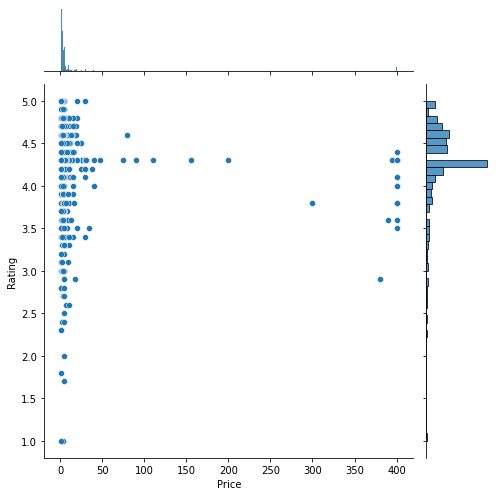

In [ ]:
paid_apps =  df[df.Type == 'Paid']
sns.jointplot(data=paid_apps, x="Price", y="Rating",size=7)

As we can observe, There are some high paid apps available with rating between 3.5 to 4.5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


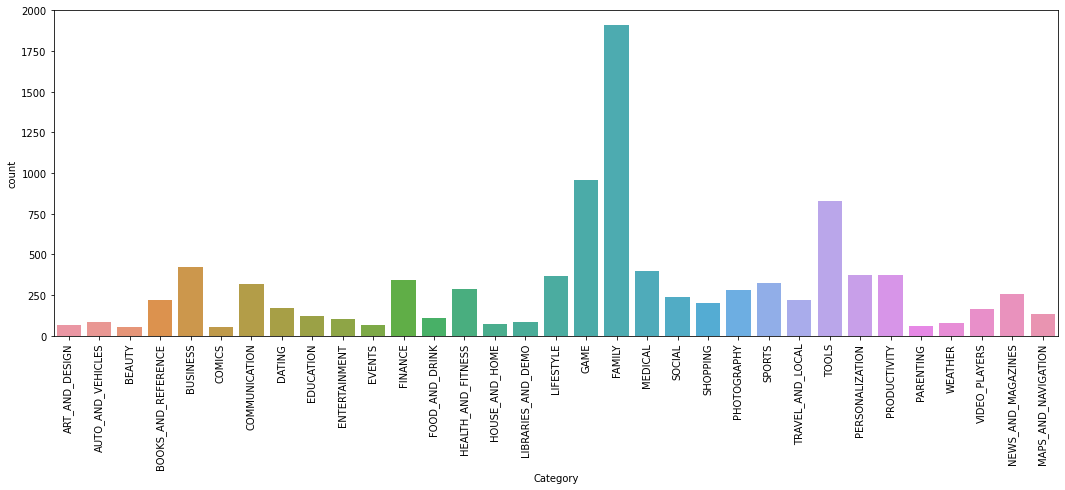

In [ ]:
def plot_number_category():
    fig, ax = plt.subplots()
    fig.set_size_inches(18, 6)
    countplot=sns.categorical.countplot(df.Category,ax=ax)
    plt.xticks(rotation = 90)
    plt.show(countplot)

plot_number_category()

From the above bar graph, we will infer that Category `Family' and 'Games' are the most counted in among all category.

([<matplotlib.patches.Wedge at 0x7f8dd38fa310>,
 [Text(-1.067313865626364, 0.26615993733412924, 'Free'),
  Text(1.0673138718562867, -0.26615991235184555, 'Paid')],
 [Text(-0.5821711994325622, 0.14517814763679776, '92.2%'),
  Text(0.5821712028307018, -0.14517813401009755, '7.8%')])

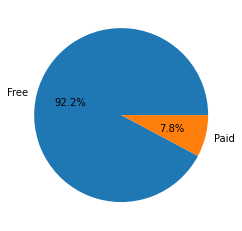

In [ ]:
plt.pie(df.Type.value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%') 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


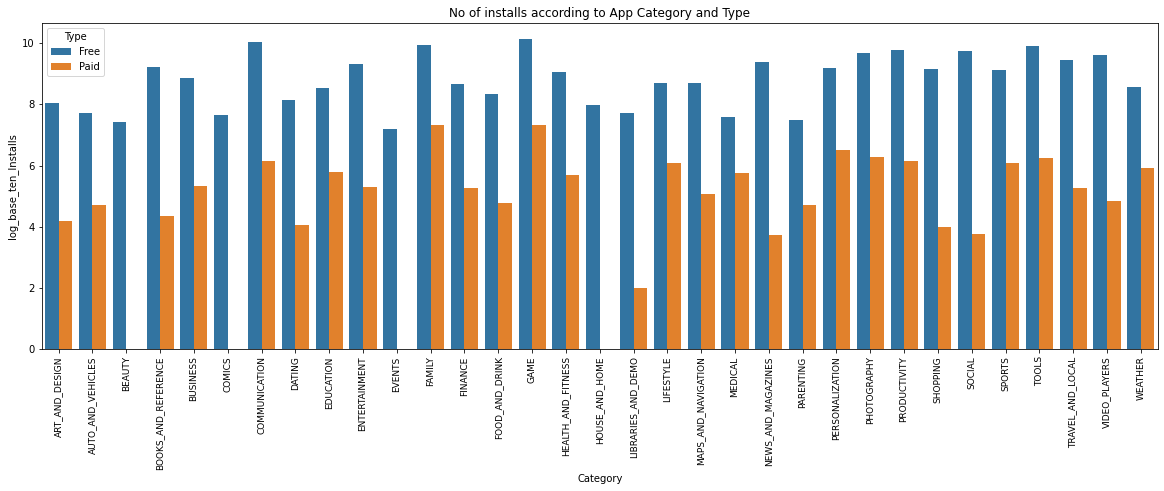

In [ ]:
category_type_wise_no_installs = df.groupby(['Category','Type'])[['Installs']].sum().reset_index()
category_type_wise_no_installs['log_base_ten_Installs'] = np.log10(category_type_wise_no_installs['Installs'])

plt.figure(figsize=(20,6))
plt.xticks(rotation=90,fontsize=9)

plt.xlabel("App Category(Fee/Paid)")
plt.ylabel("Installation No.")
plt.title("No of installs according to App Category and Type")
sns.barplot('Category', 'log_base_ten_Installs', hue='Type', data=category_type_wise_no_installs);

plt.show()

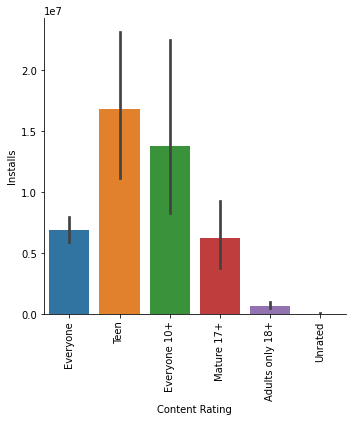

In [ ]:
sns.catplot(x='Content Rating', y='Installs', data=df,kind='bar');
plt.xticks(rotation=90);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Content Rating')

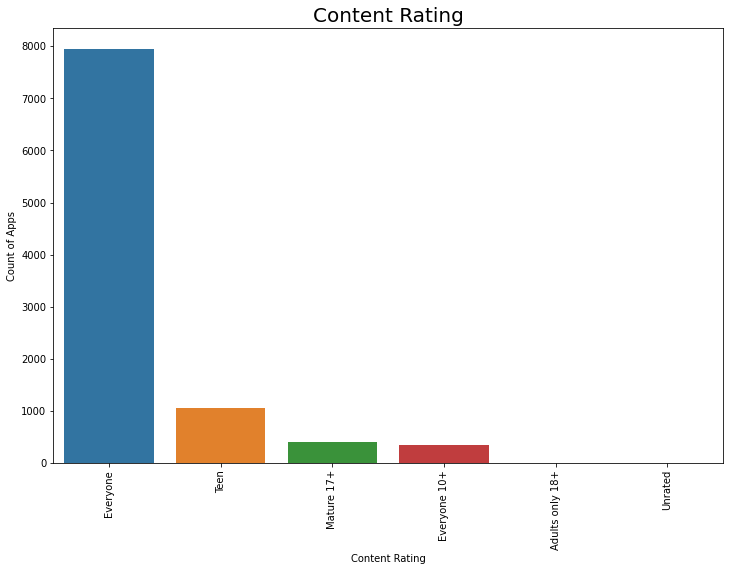

In [53]:
x_data = df['Content Rating'].value_counts().index
y_data = df['Content Rating'].value_counts()

x_data_axs = []
y_data_axs = []
for i in range(len(x_data)):
    x_data_axs.append(x_data[i])
    y_data_axs.append(y_data[i])
    
# plotting the graph

plt.figure(figsize=(12,8))
sns.barplot(x_data_axs,y_data_axs)         
plt.title('Content Rating',size = 20)
plt.xticks(rotation=90)
plt.ylabel('Count of Apps')
plt.xlabel('Content Rating')

Text(0.5, 0, 'Average Rating of Apps')

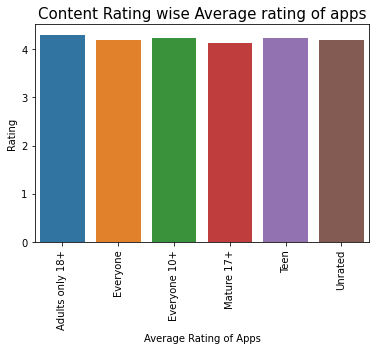

In [57]:
#Average raating of apps Content rating wise
x_content=pd.DataFrame(df.groupby('Content Rating').agg({'Rating':'mean'}))
x_content

sns.barplot(x=x_content.index,y=x_content['Rating'])        
plt.title('Content Rating wise Average rating of apps',size = 15)
plt.rcParams['figure.figsize'] = (12,8)
plt.xticks(rotation=90)
plt.ylabel('Rating')
plt.xlabel('Average Rating of Apps')


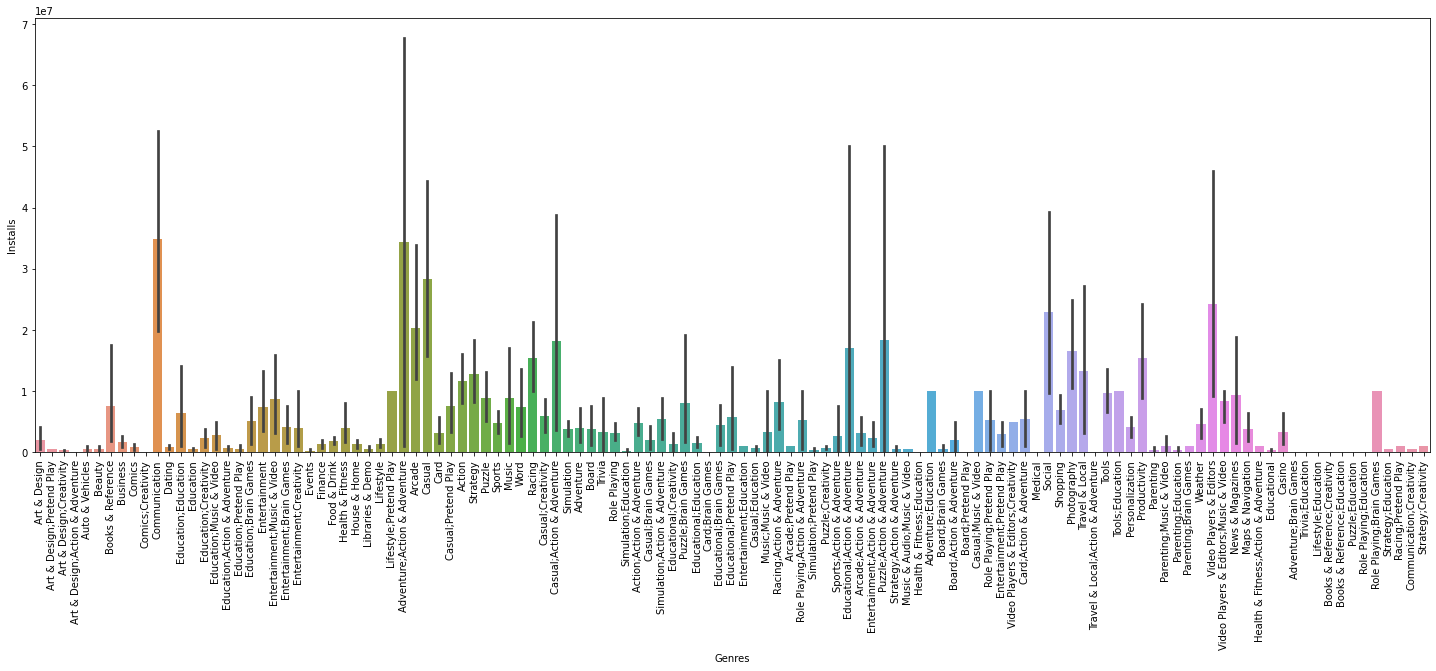

In [54]:
fig, ax = plt.subplots(figsize=(25,8))
sns.barplot(x='Genres', y='Installs', data=df,ax=ax);
plt.xticks(rotation=90);

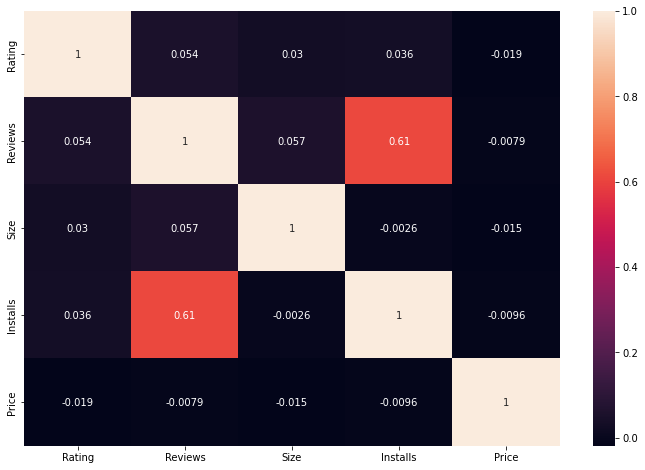

In [69]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)

# **Second Dataset**

In [ ]:
df_user.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
df_user.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


Sentiments are like boolean values of user translated reviews having values like 'positive','negetive' and 'neutral'.

Sentiment Polarity is the calibrated value of translated reviews that varies from -1 to 1. 1) For positive it would be in range 0 to 1. 2) For negetive it would be -1 to 0. 3) For neutral it will be 0.

Sentiment subjectivity is basically pitch of review.The range of pitch is from 0 to 1.If review words are too good or bad it would be rate 1.

In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


Here too many null values present in dataset so we are dropping it.

In [ ]:
df_user.dropna(inplace=True)

In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB
